# RaviKiran Bhat
# Rubanraj Ravichandran
# Ramesh Kumar

# Mind Map (Question 1)

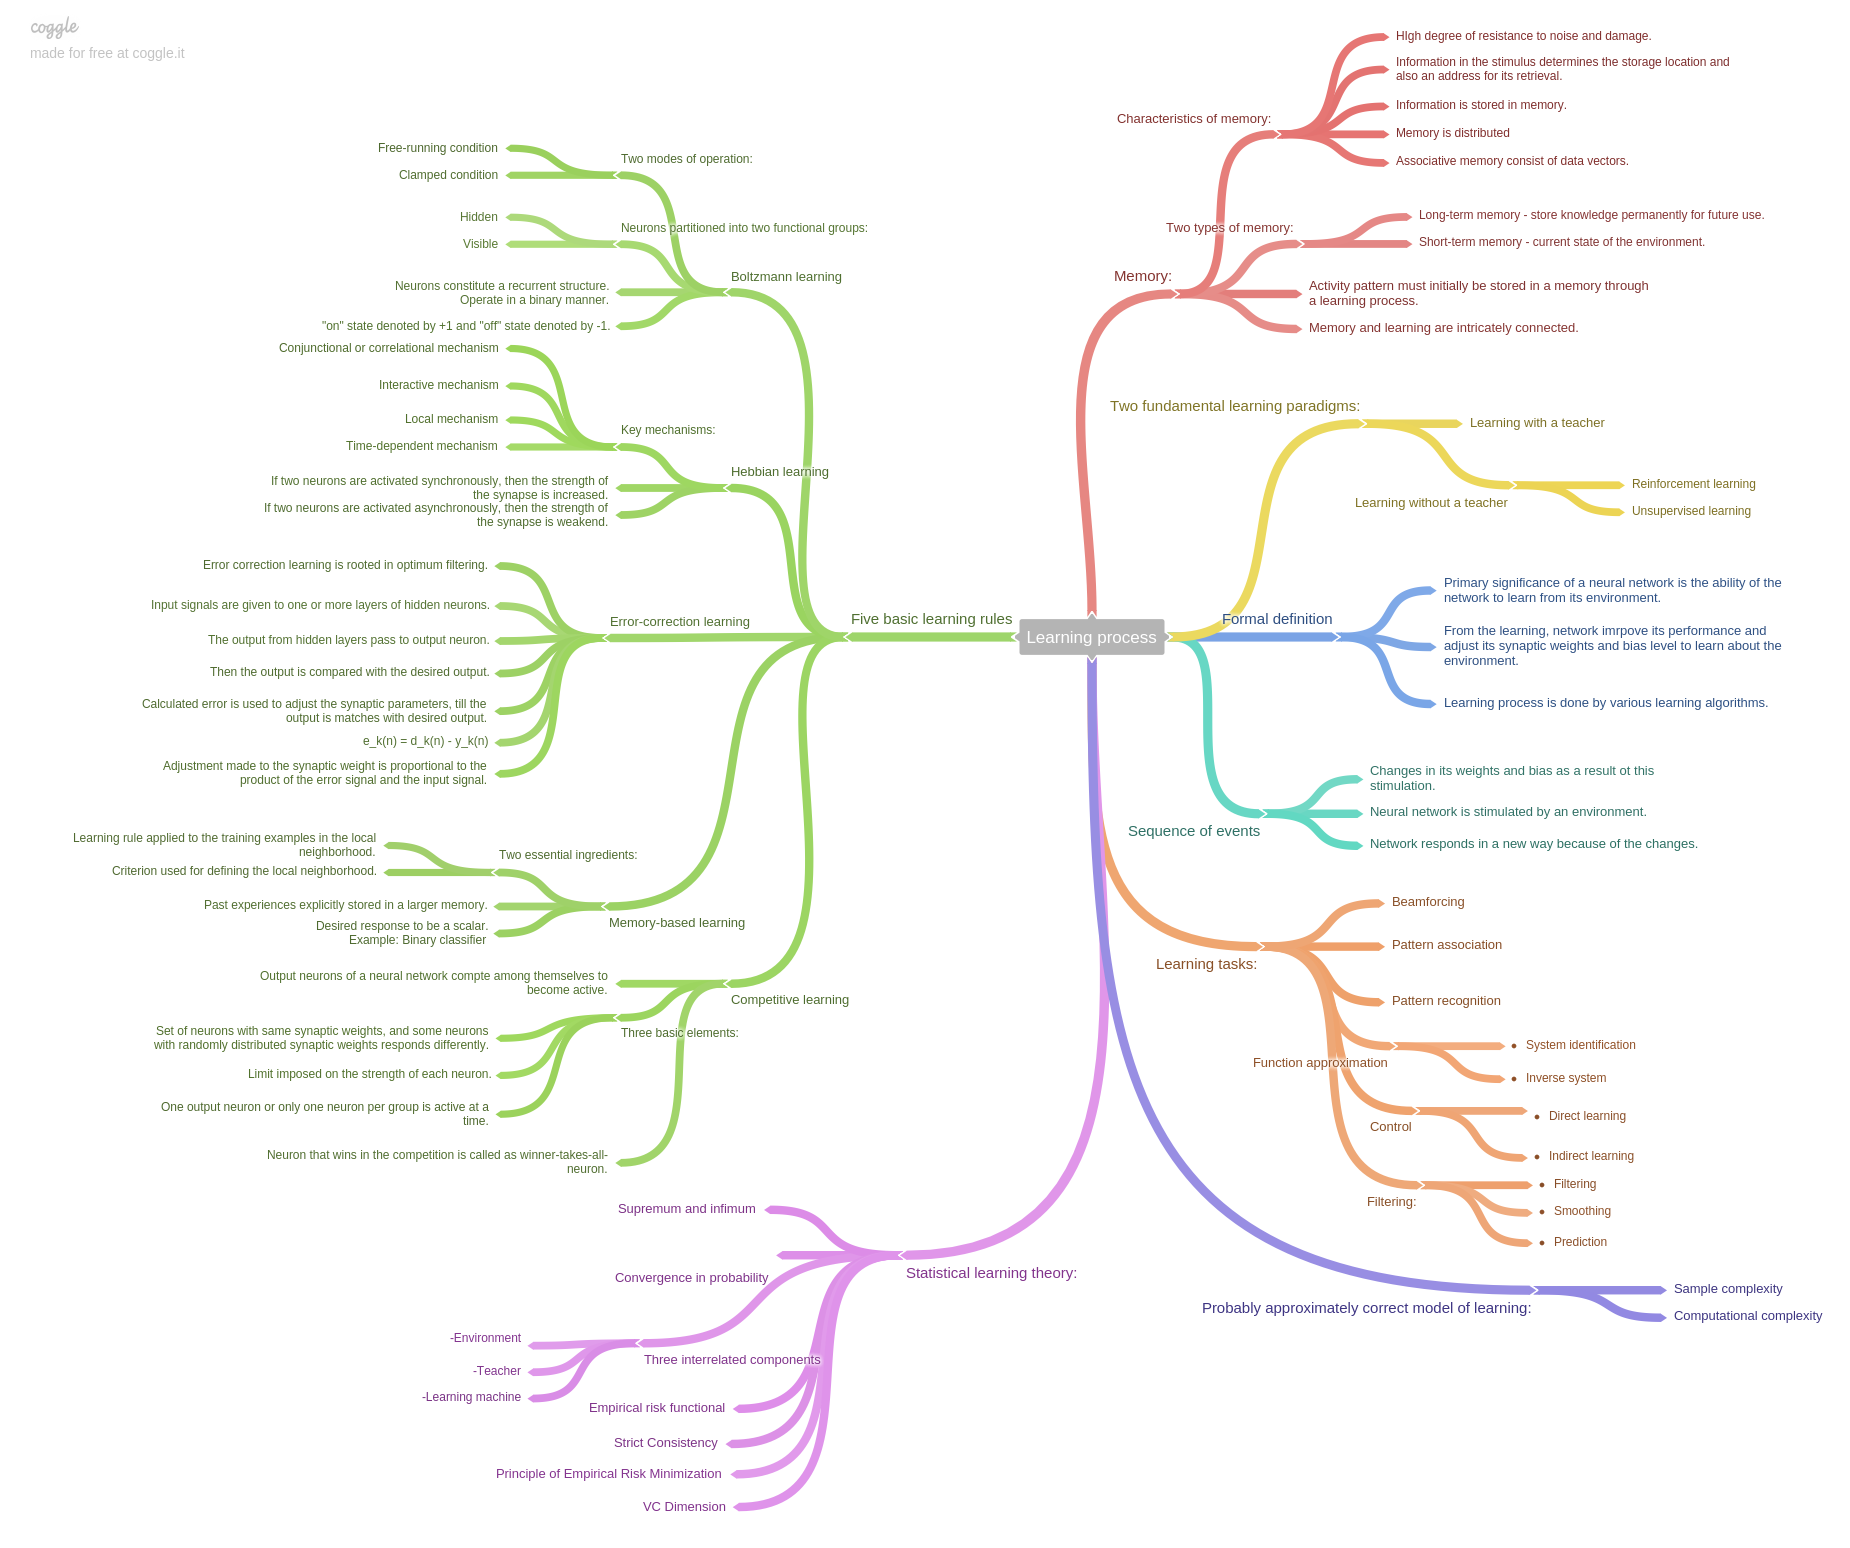

In [83]:
Image(filename='Learning_process.png')

In [1]:
import sympy as sp
import numpy as np
from random import randint
sp.init_printing()
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

In [61]:
# v1,1 and v2,1 are first hidden layer
# v1,2 and v2,2 are second hidden layer
#x1, x2 are inputs
# y is output of neuron
y,v11,v21,v22,v12,x1,x2,v31,a = sp.symbols('y,v11,v22,v21,v12,x1,x2,v31,a')

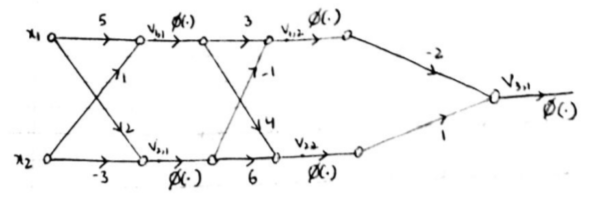

In [62]:
Image(filename='sfg.png')

# Exercise: 1.13(a)

In [63]:
def logistic(x,a=1):
        return 1/(1+sp.exp(-a*x))

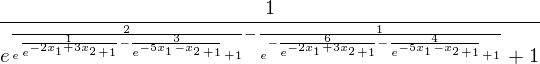

In [64]:
v11 = logistic(5*x1+x2)
v21 = logistic(2*x1-3*x2)
v12 = logistic(3*v11 - v21)
v22 = logistic(6*v21 + 4*v11)
v31 = logistic(-2*v12 + v22)
sp.simplify(v31)

# Exercise 1.13(b)

when the output neuron operates in its linear region, the output of the network can be written as : y = av+0.5 where v = $\sum w_i x_i$

In [65]:
a = 0.5
v11 = a*(5*x1+x2) + 0.5

v21 = a*(2*x1-3*x2)+ 0.5
v12 = a*(3*v11 - v21)+ 0.5
v22 = a*(6*v21 + 4*v11)+ 0.5
v31 = a*(-2*v12 + v22)+ 0.5
v31 = sp.simplify(v31)
v31

In [66]:
def calculate(x1_,x2_):
    return v31.subs({x1:x1_,x2:x2_}).evalf()

In [67]:
def get_random_vals(n):
    random_nums = []
    for i in range (0,n):
        random_nums.append(randint(-10,10))
    return random_nums

[-9, -7, -6, 2, 10, 1, -1, -4, -5, -9]


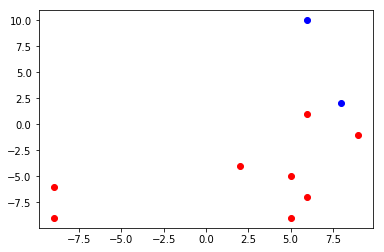

In [68]:
x1_ = get_random_vals(10)
x2_ = get_random_vals(10)
print x2_
class_a = []
class_b = []
for i in range(0,10):
    if (calculate(x1_[i],x2_[i])) > 0.5:
        class_a.append([x1_[i],x2_[i]])
    else:
        class_b.append([x1_[i],x2_[i]])

for a in class_a:
    plt.plot(a[0],a[1], 'ro') 
for b in class_b:
    plt.plot(b[0],b[1], 'bo')
plt.show()

# Question 4

In [25]:
def mult(w,x):
    return w[0]*x[0] + w[1]*x[1] + w[2]*x[2]

# weight update
def update_weight(w,x):
    learning_rate = 0.7
    return [w[0]+(x[0]*learning_rate),w[1]+(x[1]*learning_rate),w[2]+(x[2]*learning_rate)]

def get_y(x,iw):
    return (-iw[0]+(-iw[1]*x))/(iw[2])

In [26]:
#adjusted pattern
ap = [[1, -0.5, 1], [1, 1.5, -1], [1, 0.5, -1], [-1, 1.5, 2], [-1, 1.5, -1], [-1, -0.5, 2]]
#initial weights
iw = [1,0,0]
is_updated = True
epoch_counter = 0
while (is_updated == True):
    epoch_counter += 1
    is_updated = False
    for i in range(1,6):
        if mult(ap[i],iw) <= 0:
            iw = update_weight(ap[i],iw)
            is_updated = True
            
print "final weight vector ", iw
print "bias ", iw[0]
print "number of iterations : ", epoch_counter

# plot all inputs
for i in range(0,6):
    plt.scatter(ap[i][1] if i < 3 else -ap[i][1],
                ap[i][2] if i < 3 else -ap[i][2], 
                color= 'red' if i < 3 else 'blue',s=200, 
                facecolors='none',
                marker='$\\bigoplus$' if i < 3 else '$\\ominus$')

plt.plot(np.linspace(-2.0, 2.0, num=10),[get_y(x,iw) for x in np.linspace(-2.0, 2.0, num=10)])

KeyboardInterrupt: 